# Audio Processing in Python



# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

### Processing a Noisy and Clean Signal

- There are two noisy and clean signals in the same folder
- Generate MFCC of both the Signals and report the differences 

In [ ]:
pip install librosa


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def compare_mfcc(noisy_file, clean_file):
    
    y_noisy, sr = librosa.load(noisy_file, sr=None)
    y_clean, sr = librosa.load(clean_file, sr=None)
    
    mfcc_noisy = librosa.feature.mfcc(y=y_noisy, sr=sr, n_mfcc=40)
    mfcc_clean = librosa.feature.mfcc(y=y_clean, sr=sr, n_mfcc=40)
    
    mae = np.mean(np.abs(mfcc_noisy - mfcc_clean))
    print("Mean Absolute Error:", mae)


In [8]:
noisy_file = r"C:\Users\91900\Downloads\Noisy-Signal.wav"
clean_file = r"C:\Users\91900\Downloads\Clean-Signal.wav"
compare_mfcc(noisy_file, clean_file)

Mean Absolute Error: 4.8522058


### Trimming and Processing the Signal 
- The >Example.wav file contains is of a very large length. 
- Plot the MFCC
- Trim the first 4 Seconds of Audio and plot the MFCC 
- Observe the Changes



In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def process_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
 
    mfcc_full = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    trim_len = int(4 * sr)  # Convert seconds to samples
    y_trimmed = y[:trim_len]
    mfcc_trimmed = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=40)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(mfcc_full, x_axis='time')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.title("MFCC of Full Audio")
    plt.subplot(2, 1, 2)
    librosa.display.specshow(mfcc_trimmed, x_axis='time')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.title("MFCC of First 4 Seconds")

    plt.tight_layout()
    plt.show()

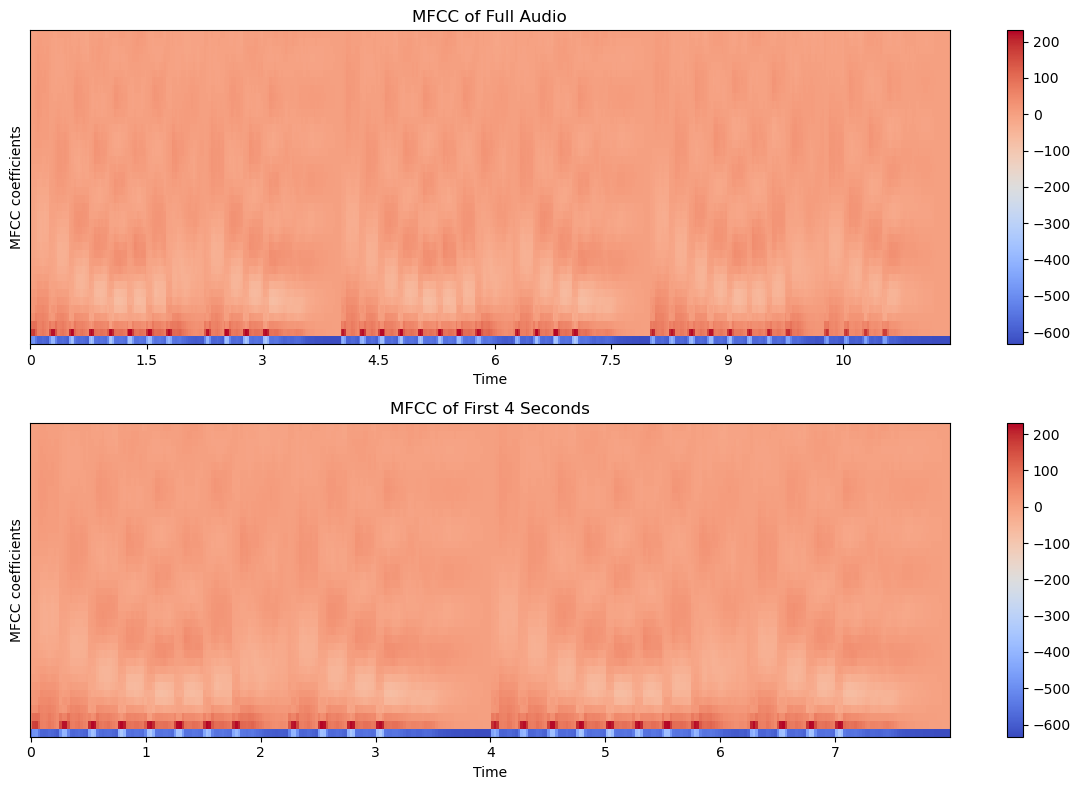

In [27]:
file_path = r"C:\Users\91900\Downloads\Example.wav"
process_audio(file_path)

ParameterError: Unknown axis type: mfcc

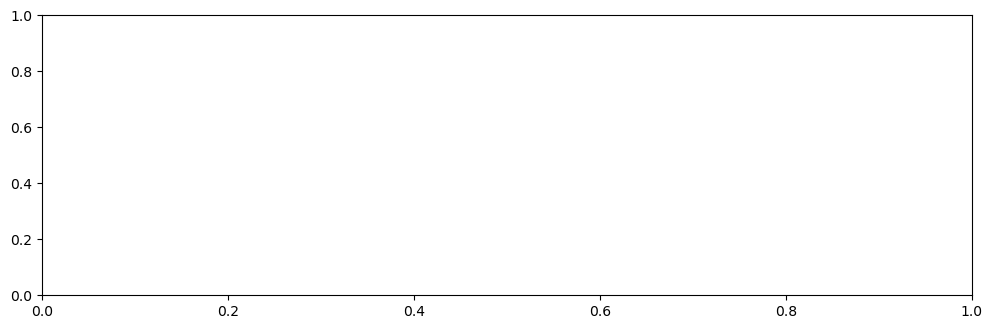